# Installing Python

This document is a "Jupyter notebook." It combines formatted text and images with  runnable computer code. The goal of this notebook is to guide you to install python and a handful of useful packages on your computer. A handy package manager for python is called Anaconda (get it?).

1. Download these files:
    - http://www.pitt.edu/~djn23/phys1321/environment.yml
    - http://www.pitt.edu/~djn23/phys1321/grading_helper.py
2. The first file, `environment.yml` will only be used once when we first install Anaconda. The second, `grading_helper.py` is used to help me with grading your notebooks. You need to have a copy of this file anywhere you have a graded notebook. I suggest making a `phys1321` folder on your computer and keeping a copy of `grading_helper.py` there. If you want to use subfolders to organize your materials, just make multiple copies of the file.
3. (Skip this step if you already have Anaconda installed.) Download [miniconda](https://docs.conda.io/en/latest/miniconda.html) (this is a smaller download than the full Anaconda). You want the Python 3.7, 64-bit version.
> During installation, you will be asked if you want to add Anaconda to your computer's PATH. If you say "yes," then you can run miniconda from any terminal. If you say "no," then you need to use the Anaconda Prompt. Personally, I answer "yes" for the convenience.
4. After installing you should have a new shortcut called "Anaconda Prompt." Open it and run `conda list` - if it works then you're good up to this point. If it doesn't, review the official installation instructions [here](https://conda.io/projects/conda/en/latest/user-guide/install/index.html).
5. Use the Anaconda Prompt (or a terminal) to run the following commands in order:
    - `conda update conda`
    - `conda install anaconda-navigator`
    - `conda env create -f /path/to/environment.yml` (Replace "/path/to/environment.yml" with the actual path to that file.)
    - `conda activate phys1321`
    - `conda clean --all`
    - `jupyter labextension install @jupyter-widgets/jupyterlab-manager`
6. Now you have two options. If you're comfortable using the command line, you can run jupyter with:
    - `conda activate phys1321`
    - `jupyter lab`

   The other option is to use Anaconda Navigator. You should have a shortcut for it. Open it and use the drop down next to "Applications on" to select "phys1321." Then click the "Launch" button for Jupyter.
   
---   
### Activating phys1321 every time is a pain.

Yeah, I know, but it's setup this way in case you want to use Anaconda with multiple projects. Sometimes different versions of python packages conflict with one another. This way, each set of packages lives in its own environment (phys1321 is an environment), which protects you from having everything break if you add a bad package. If in the future you want to start a new python project, you can create a new environment for it without any risk to your setup for this class. See the [Anaconda documentation](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

It is possible to install everything in your base environment, but if things go wrong, you'll need to start from scratch. If you want to risk it, you can look inside `environment.yml` to see the list of packages you need, and install each with `conda install <package1> <package2> ... -c conda-forge`

The `-c conda-forge` part tells Anaconda that you want to use the "conda-forge" repository, which has a large selection of packages (namely ffmpeg).

Of course, there are ways to keep separate environments and also launch Jupyter with less typing or clicking. None of them are especially easy to describe given the differences between Windows, MacOS, and Linux, so I'll leave the details as a exercise for the reader. Let your laziness motivate you 😛

# Check Your Installation

In [1]:
# see if required packages are installed
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
from IPython import display

In [2]:
# try an integration
def f(x): return x**2
I, err = integrate.quad(f, 0, 1)
print(I)

0.33333333333333337


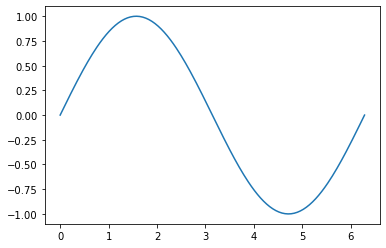

In [3]:
# make a plot
theta = np.linspace(0, 2*np.pi, 200)
plt.plot(theta, np.sin(theta))
plt.show()

# Check Widgets

Even if installed correctly, widgets don't work in some web browsers (specifically Internet Explorer). Try a recent version of Chrome, Firefox, etc.

In [4]:
def plotter(phi):
    plt.plot(theta, np.sin(theta + phi))
    plt.show()

slider = widgets.FloatSlider(min=0, max=2*np.pi)
gui = widgets.interactive(plotter, phi=slider)
display.display(gui)

interactive(children=(FloatSlider(value=0.0, description='phi', max=6.283185307179586), Output()), _dom_classe…

# Check Animations

MacOS can have issues. The root of the problem is that conda's version of [ffmpeg](https://ffmpeg.org/download.html) doesn't always work. In the past, students have had success installing in via [Homebrew](https://brew.sh/) (install Homebrew then run `brew install ffmpeg` in a terminal).

In [5]:
fig = plt.figure()
line, = plt.plot([])
plt.xlim(0, 2*np.pi)
plt.ylim(-1.1, 1.1)

def update(frame):
    line.set_data(theta, np.sin(theta + frame/100*2*np.pi))
    
anim = FuncAnimation(fig, update, frames=100, interval=20)
video = anim.to_html5_video()
html= display.HTML(video)
display.display(html)
plt.close()

# Checking Behavior of Graded Cells

In [6]:
# did you download grading_helper.py?
import grading_helper

In [7]:
%%graded

# this cell should turn blue when run

In [8]:
%%tests

# this cell should turn yellow when run

Nothing to test yet...


In [9]:
%%graded

x = 1

In [10]:
%%tests

# this cell should turn green when run

grading_helper.equal(x, 1)

All tests passed!


In [11]:
%%tests

# this cell should turn red and show an error when run

grading_helper.equal(x, 2)

AssertionError: 
Items are not equal:
 ACTUAL: 1
 DESIRED: 2